# Fit and save MNIST model

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(20, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.05)
model.save('mnistmodel.h5')

Using TensorFlow backend.


Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 7s 115us/step - loss: 0.5202 - acc: 0.8597 - val_loss: 0.2237 - val_acc: 0.9400
Epoch 2/20
57000/57000 [==============================] - 5s 88us/step - loss: 0.2801 - acc: 0.9205 - val_loss: 0.1920 - val_acc: 0.9483
Epoch 3/20
57000/57000 [==============================] - 5s 86us/step - loss: 0.2440 - acc: 0.9299 - val_loss: 0.1721 - val_acc: 0.9503
Epoch 4/20
57000/57000 [==============================] - 5s 87us/step - loss: 0.2178 - acc: 0.9372 - val_loss: 0.1649 - val_acc: 0.9533
Epoch 5/20
57000/57000 [==============================] - 5s 87us/step - loss: 0.1988 - acc: 0.9418 - val_loss: 0.1545 - val_acc: 0.9580
Epoch 6/20
57000/57000 [==============================] - 5s 87us/step - loss: 0.1854 - acc: 0.9460 - val_loss: 0.1537 - val_acc: 0.9560
Epoch 7/20
57000/57000 [==============================] - 5s 86us/step - loss: 0.1751 - acc: 0.9494 - val_loss: 0.1370 - val_acc

# Restart and data preprocessing

In [1]:
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical

(_, _), (X_test, y_test) = mnist.load_data()

model = load_model('mnistmodel.h5')

X_test = X_test.reshape(len(X_test), -1)
X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)

Using TensorFlow backend.


# Accuracy and Error rate

$Accuracy=\frac{TP+TN}{P+N}$, `TP` is the number of true positives and `FP` is the number of false positives

$ErrorRate=1-Accuracy$

- Use the `evaluate` function in Keras
- Use the `accuracy_score` function in sklearn

In [2]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Error Rate: {:.2f}%'.format((1 - accuracy) * 100))

10000/10000 [==============================] - 1s 93us/step
Accuracy: 95.86%
Error Rate: 4.14%


In [3]:
import numpy as np
from sklearn.metrics import accuracy_score
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Error rate: {:.2f}%'.format((1 - accuracy) * 100))

Accuracy: 95.86%
Error rate: 4.14%


# Precision、Recall、Confusion matrix and F1

$Precision=\frac{TP}{TP+FP}$

$Recall=\frac{TP}{TP+FN}$, `FN` is the number of false negatives

$F1=\frac{2×TP}{n\_samples+TP-TN}$, `TN` is the number of true negatives

- Use the `precision_score`、`recall_score`、`f1_score` function in sklearn

<center>Confusion matrix
    
<br>
    

||Predict Positive | Predict Negative |
|--|--|--|
|Actual Positive | TP(True Positive) | FN(False Negative)|
|Actual Negative|FP(False Positive)|TN(True Negative)|

In [4]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='weighted')
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1: {:.2f}%'.format(f1 * 100))

Precision: 95.87%
Recall: 95.79%
F1: 95.86%


In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[ 958,    0,    5,    3,    1,    2,    5,    3,    3,    0],
       [   0, 1120,    5,    2,    0,    1,    3,    0,    4,    0],
       [   2,    2, 1000,    8,    3,    1,    3,    3,    9,    1],
       [   0,    0,    9,  981,    1,    6,    0,    6,    4,    3],
       [   2,    0,    8,    3,  930,    0,    8,    5,    3,   23],
       [   6,    3,    2,   25,    1,  834,    6,    2,    9,    4],
       [  11,    4,    1,    1,    5,    8,  925,    0,    3,    0],
       [   1,    5,   19,    3,    3,    1,    0,  982,    4,   10],
       [   5,    5,    4,   26,    6,    7,    4,    4,  906,    7],
       [   5,    6,    2,   10,   14,    6,    0,    6,   10,  950]],
      dtype=int64)

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

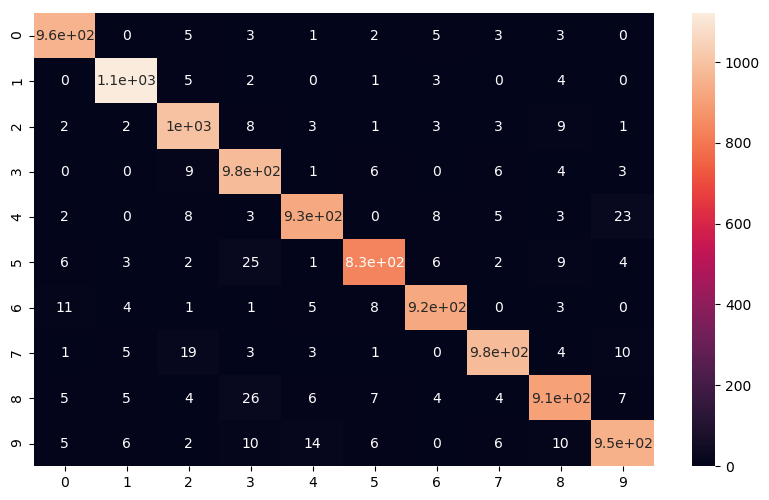

In [7]:
plt.figure(figsize=(10, 6),dpi=100)
sn.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [8]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.97      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.96      0.93      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.93      0.94       974
           9       0.95      0.94      0.95      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# ROC and AUC

Many learners generate a possibility prediction based on the test sample, and then compare this predicted value with a classification threshold. The greater are positive and the less are negative. Sorting the predicted values of many test samples, place the most likely positive example on the front and the most unlikely positive example on the back. The classification process is equivalent to dividing the sample into two parts at a certain truncation point in this sorting. The former part is positive and the latter part is negative.

The vertical axis of the ROC(Receiver Operating Characteristic) curve is TPR(True Positive Rate) and the horizontal axis is FPR(False Positive Rate).

$TPR=\frac{TP}{TP+FN}$

$FPR=\frac{FP}{TN+FP}$

AUC is the area under ROC curve.

$AUC=\frac{1}{2}\sum_{i=1}^{m-1}(x_{i+1}-x_{i})*(y_{i}+y_{i+1})$

- Use the `roc_auc_score` function for binary classification in sklearn (DOESN'T WORK ON MNIST)
- Use the `roc_curve` and `auc` function for multiple classification in sklearn

In [9]:
from sklearn.metrics import roc_curve, auc
y_scores = model.predict(X_test)

# AUC of each classes
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('AUC class {}: {:.4f}'.format(i, roc_auc[i]))

# AUC of micro-average
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_scores.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
print('AUC micro-average: {:.4f}'.format(roc_auc['micro']))

# AUC of macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])
print('AUC macro-average: {:.4f}'.format(roc_auc['macro']))

AUC class 0: 0.9921
AUC class 1: 0.9928
AUC class 2: 0.9786
AUC class 3: 0.9373
AUC class 4: 0.9849
AUC class 5: 0.9616
AUC class 6: 0.9897
AUC class 7: 0.9879
AUC class 8: 0.8285
AUC class 9: 0.9470
AUC micro-average: 0.9676
AUC macro-average: 0.9601


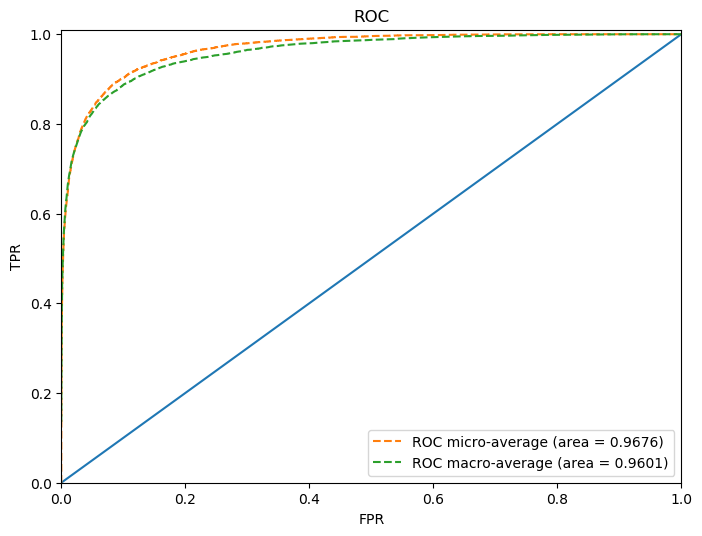

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot([0, 1])
plt.plot(fpr['micro'], tpr['micro'], label='ROC micro-average (area = {:.4})'.format(roc_auc['micro']), linestyle='--')
plt.plot(fpr['macro'], tpr['macro'], label='ROC macro-average (area = {:.4})'.format(roc_auc['macro']), linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

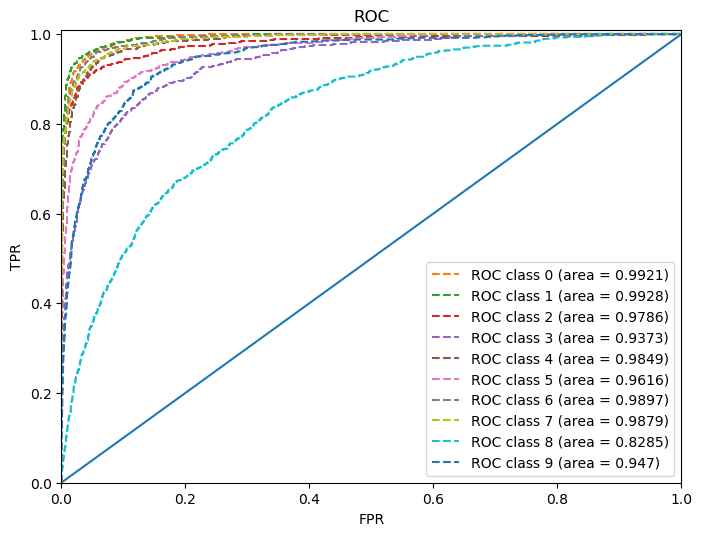

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot([0, 1])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC class {} (area = {:.4})'.format(i, roc_auc[i]), linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()